 Step 1: Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
carDetails = pd.read_csv("/Users/z003zyj/Downloads/CarPrice_Assignment.csv" ,encoding = "ISO-8859-1")

In [3]:
carDetails.shape

(205, 26)

In [4]:
carDetails.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
carDetails.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
carDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
carDetails.nunique

<bound method DataFrame.nunique of      car_ID  symboling                       CarName fueltype aspiration  \
0         1          3            alfa-romero giulia      gas        std   
1         2          3           alfa-romero stelvio      gas        std   
2         3          1      alfa-romero Quadrifoglio      gas        std   
3         4          2                   audi 100 ls      gas        std   
4         5          2                    audi 100ls      gas        std   
5         6          2                      audi fox      gas        std   
6         7          1                    audi 100ls      gas        std   
7         8          1                     audi 5000      gas        std   
8         9          1                     audi 4000      gas      turbo   
9        10          0           audi 5000s (diesel)      gas      turbo   
10       11          2                      bmw 320i      gas        std   
11       12          0                      bmw 320i 

 Step 2: Dropping the unwanted fields.

In [8]:
carDetails = carDetails.drop(['car_ID'],axis=1)

In [9]:
carDetails.shape

(205, 25)

In [10]:
carDetails.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


 Step 3: Cleaning Data.

In [11]:
carDetails['CarCompany'] = carDetails['CarName'].str.partition('-')[0]

In [12]:
carDetails['CarCompany'] = carDetails['CarCompany'].str.partition(' ')[0]

In [13]:
carDetails = carDetails.drop(['CarName'],axis=1)

In [14]:
carDetails.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompany'],
      dtype='object')

In [15]:
carDetails['CarCompany'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
carDetails.CarName = carDetails['CarCompany'].str.lower()
carDetails['CarCompany'] = carDetails['CarCompany'].str.replace('vw','volkswagen')
carDetails['CarCompany'] = carDetails['CarCompany'].str.replace('vokswagen','volkswagen')
carDetails['CarCompany'] = carDetails['CarCompany'].str.replace('toyouta','toyota')
carDetails['CarCompany'] = carDetails['CarCompany'].str.replace('porcshce','porsche')
carDetails['CarCompany'] = carDetails['CarCompany'].str.replace('maxda','mazda')

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [17]:
carDetails['CarCompany'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Step 4: Visualising the Data

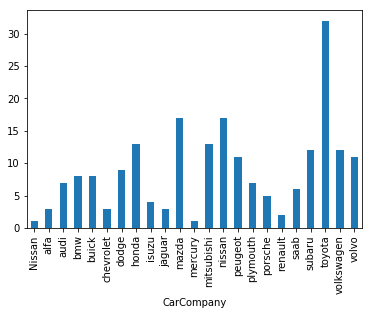

In [18]:

carDetails.groupby('CarCompany')['price'].size().plot(kind='bar')



Visualising Numeric Variables

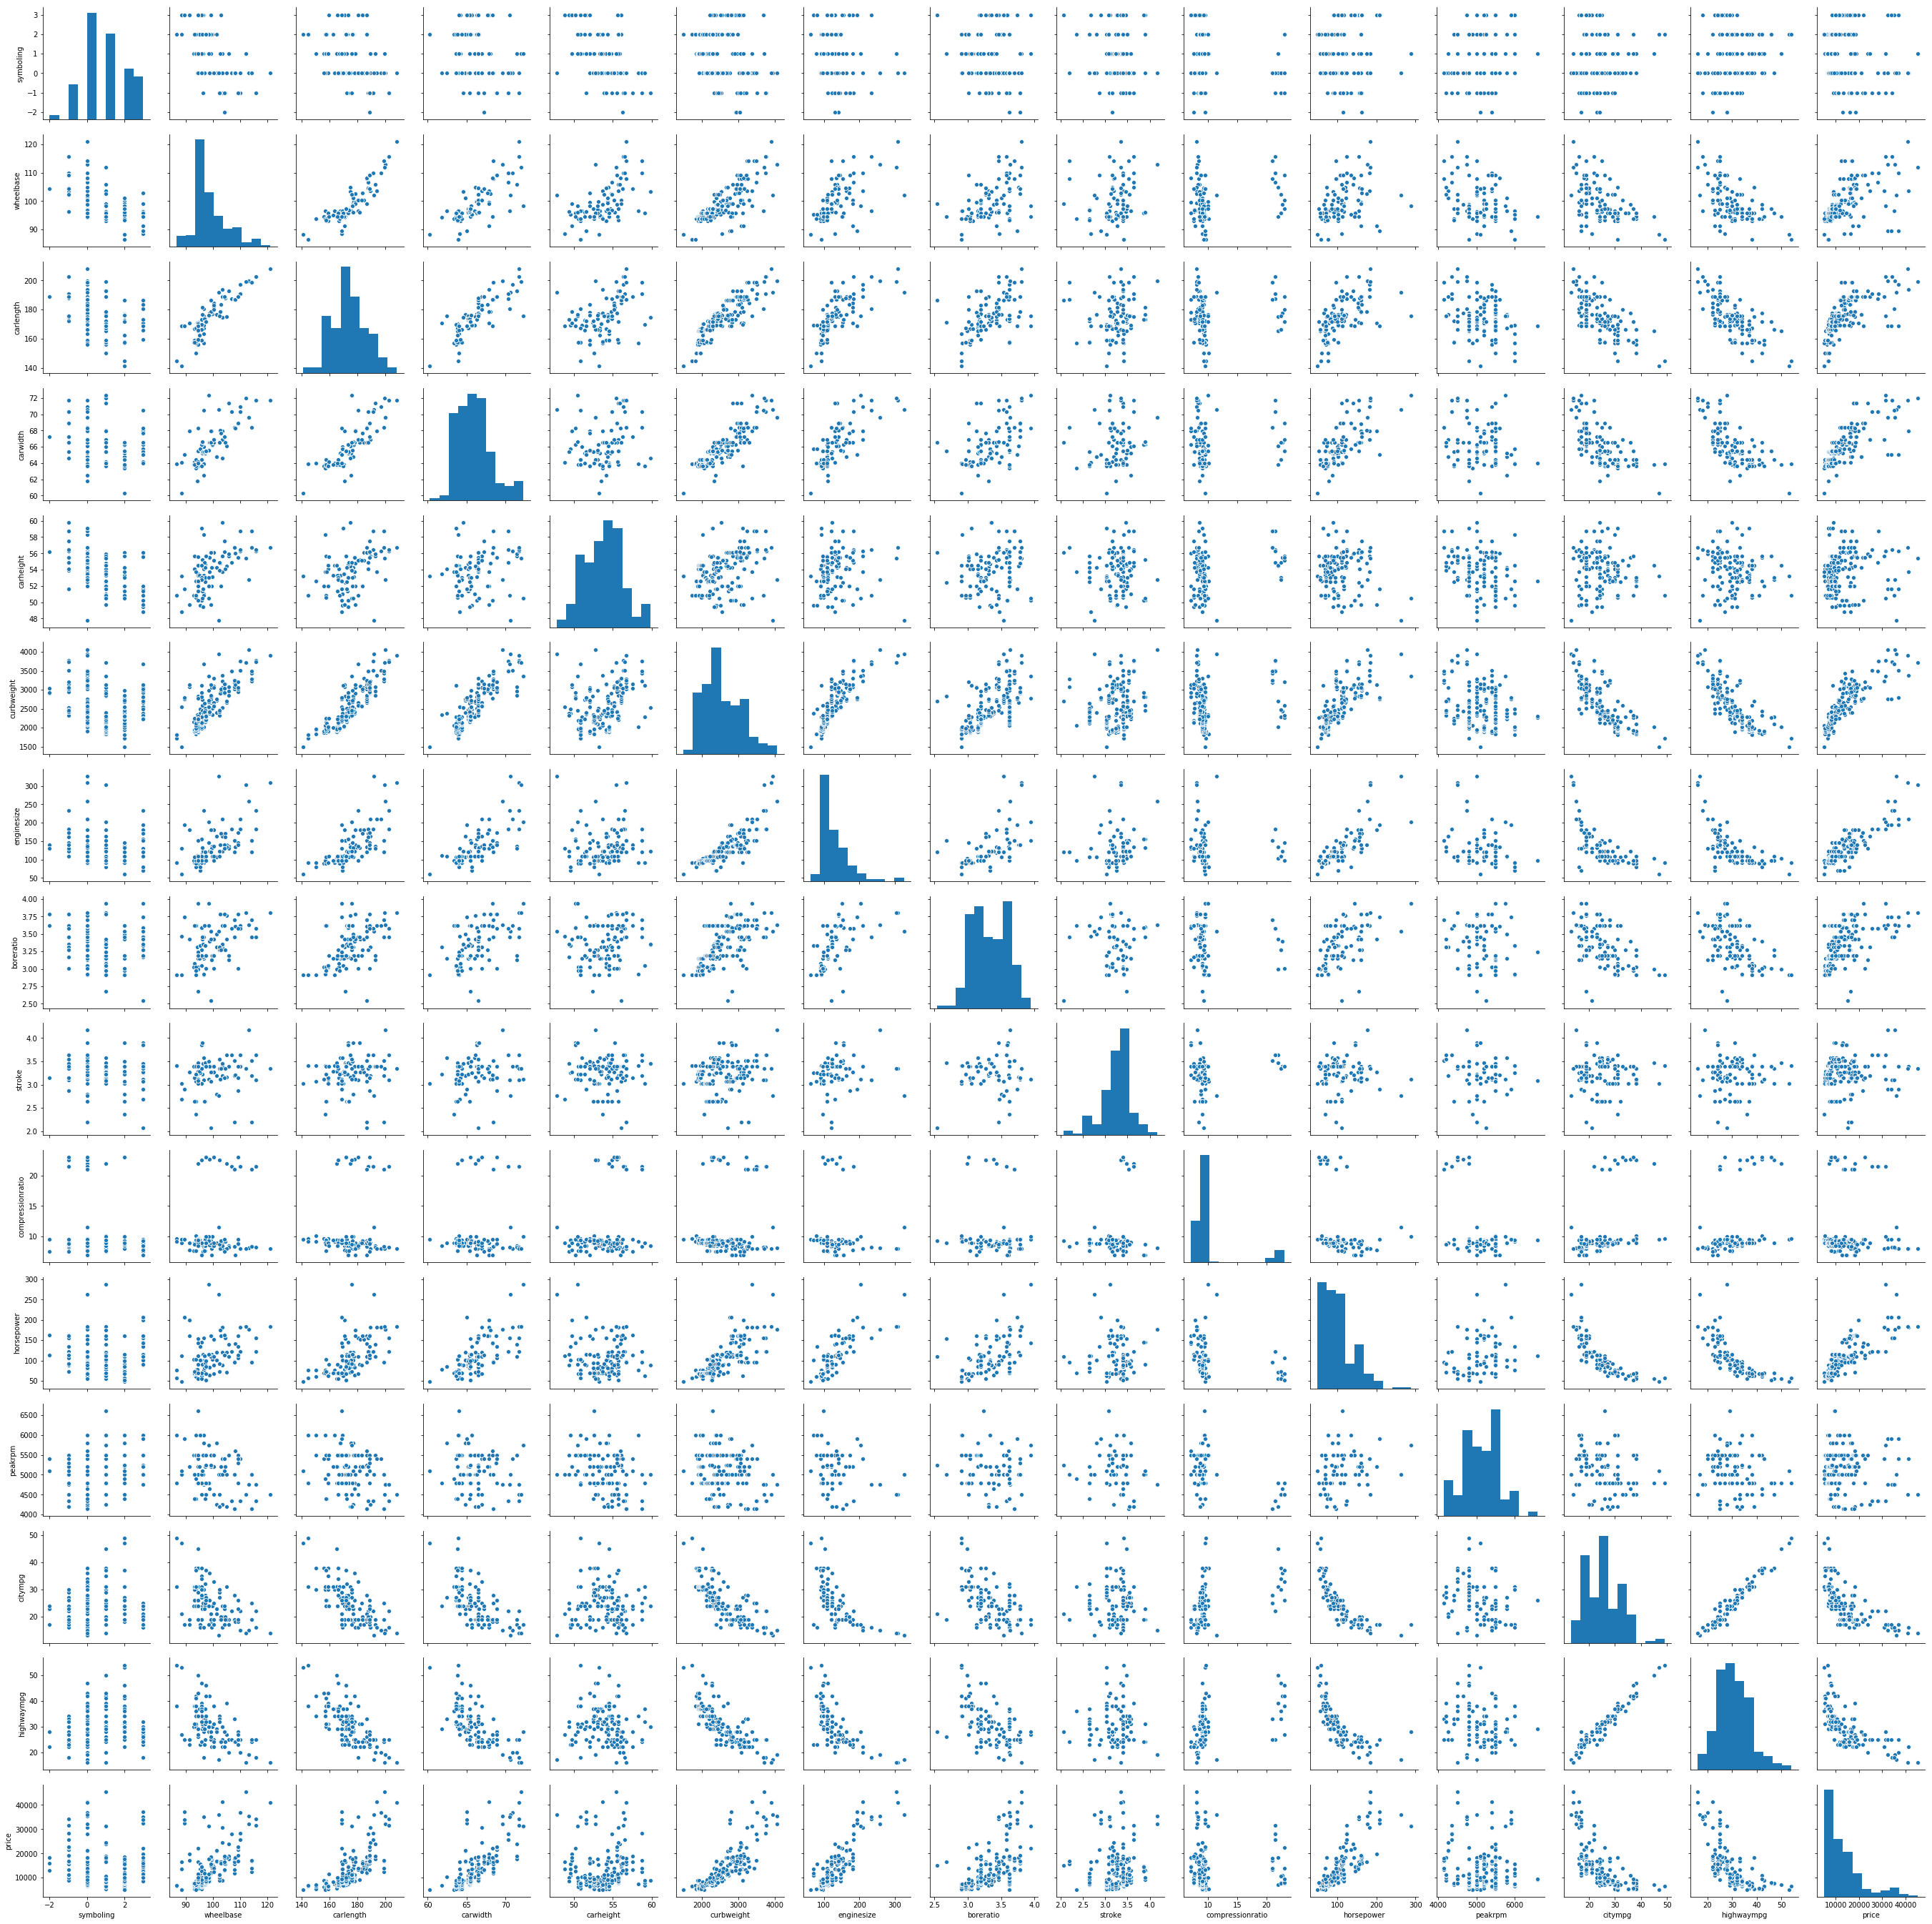

In [19]:
sns.pairplot(carDetails)
plt.show()

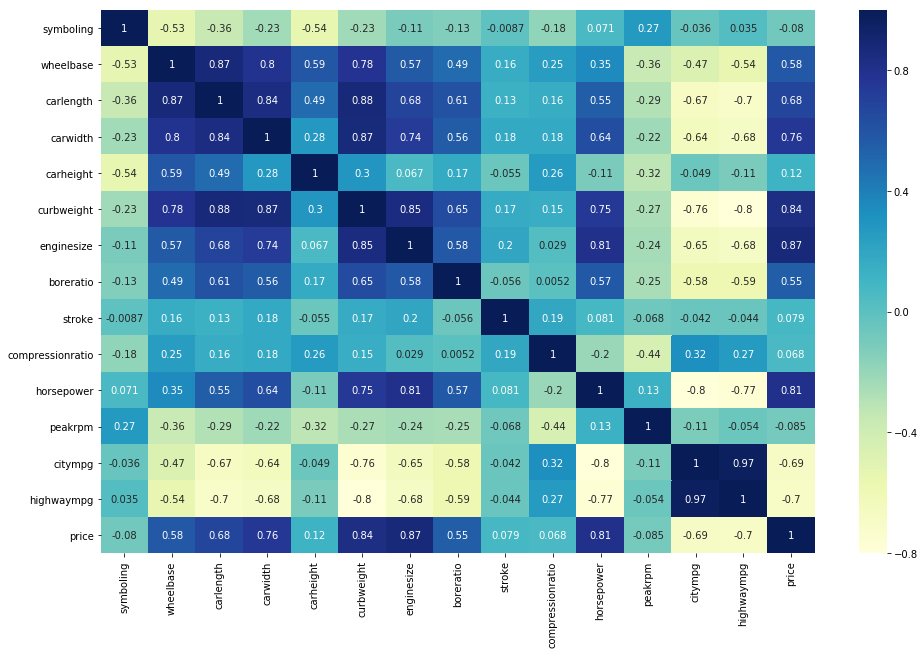

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(carDetails.corr(),annot=True,cmap= 'YlGnBu')

Visualising Categorical Variables

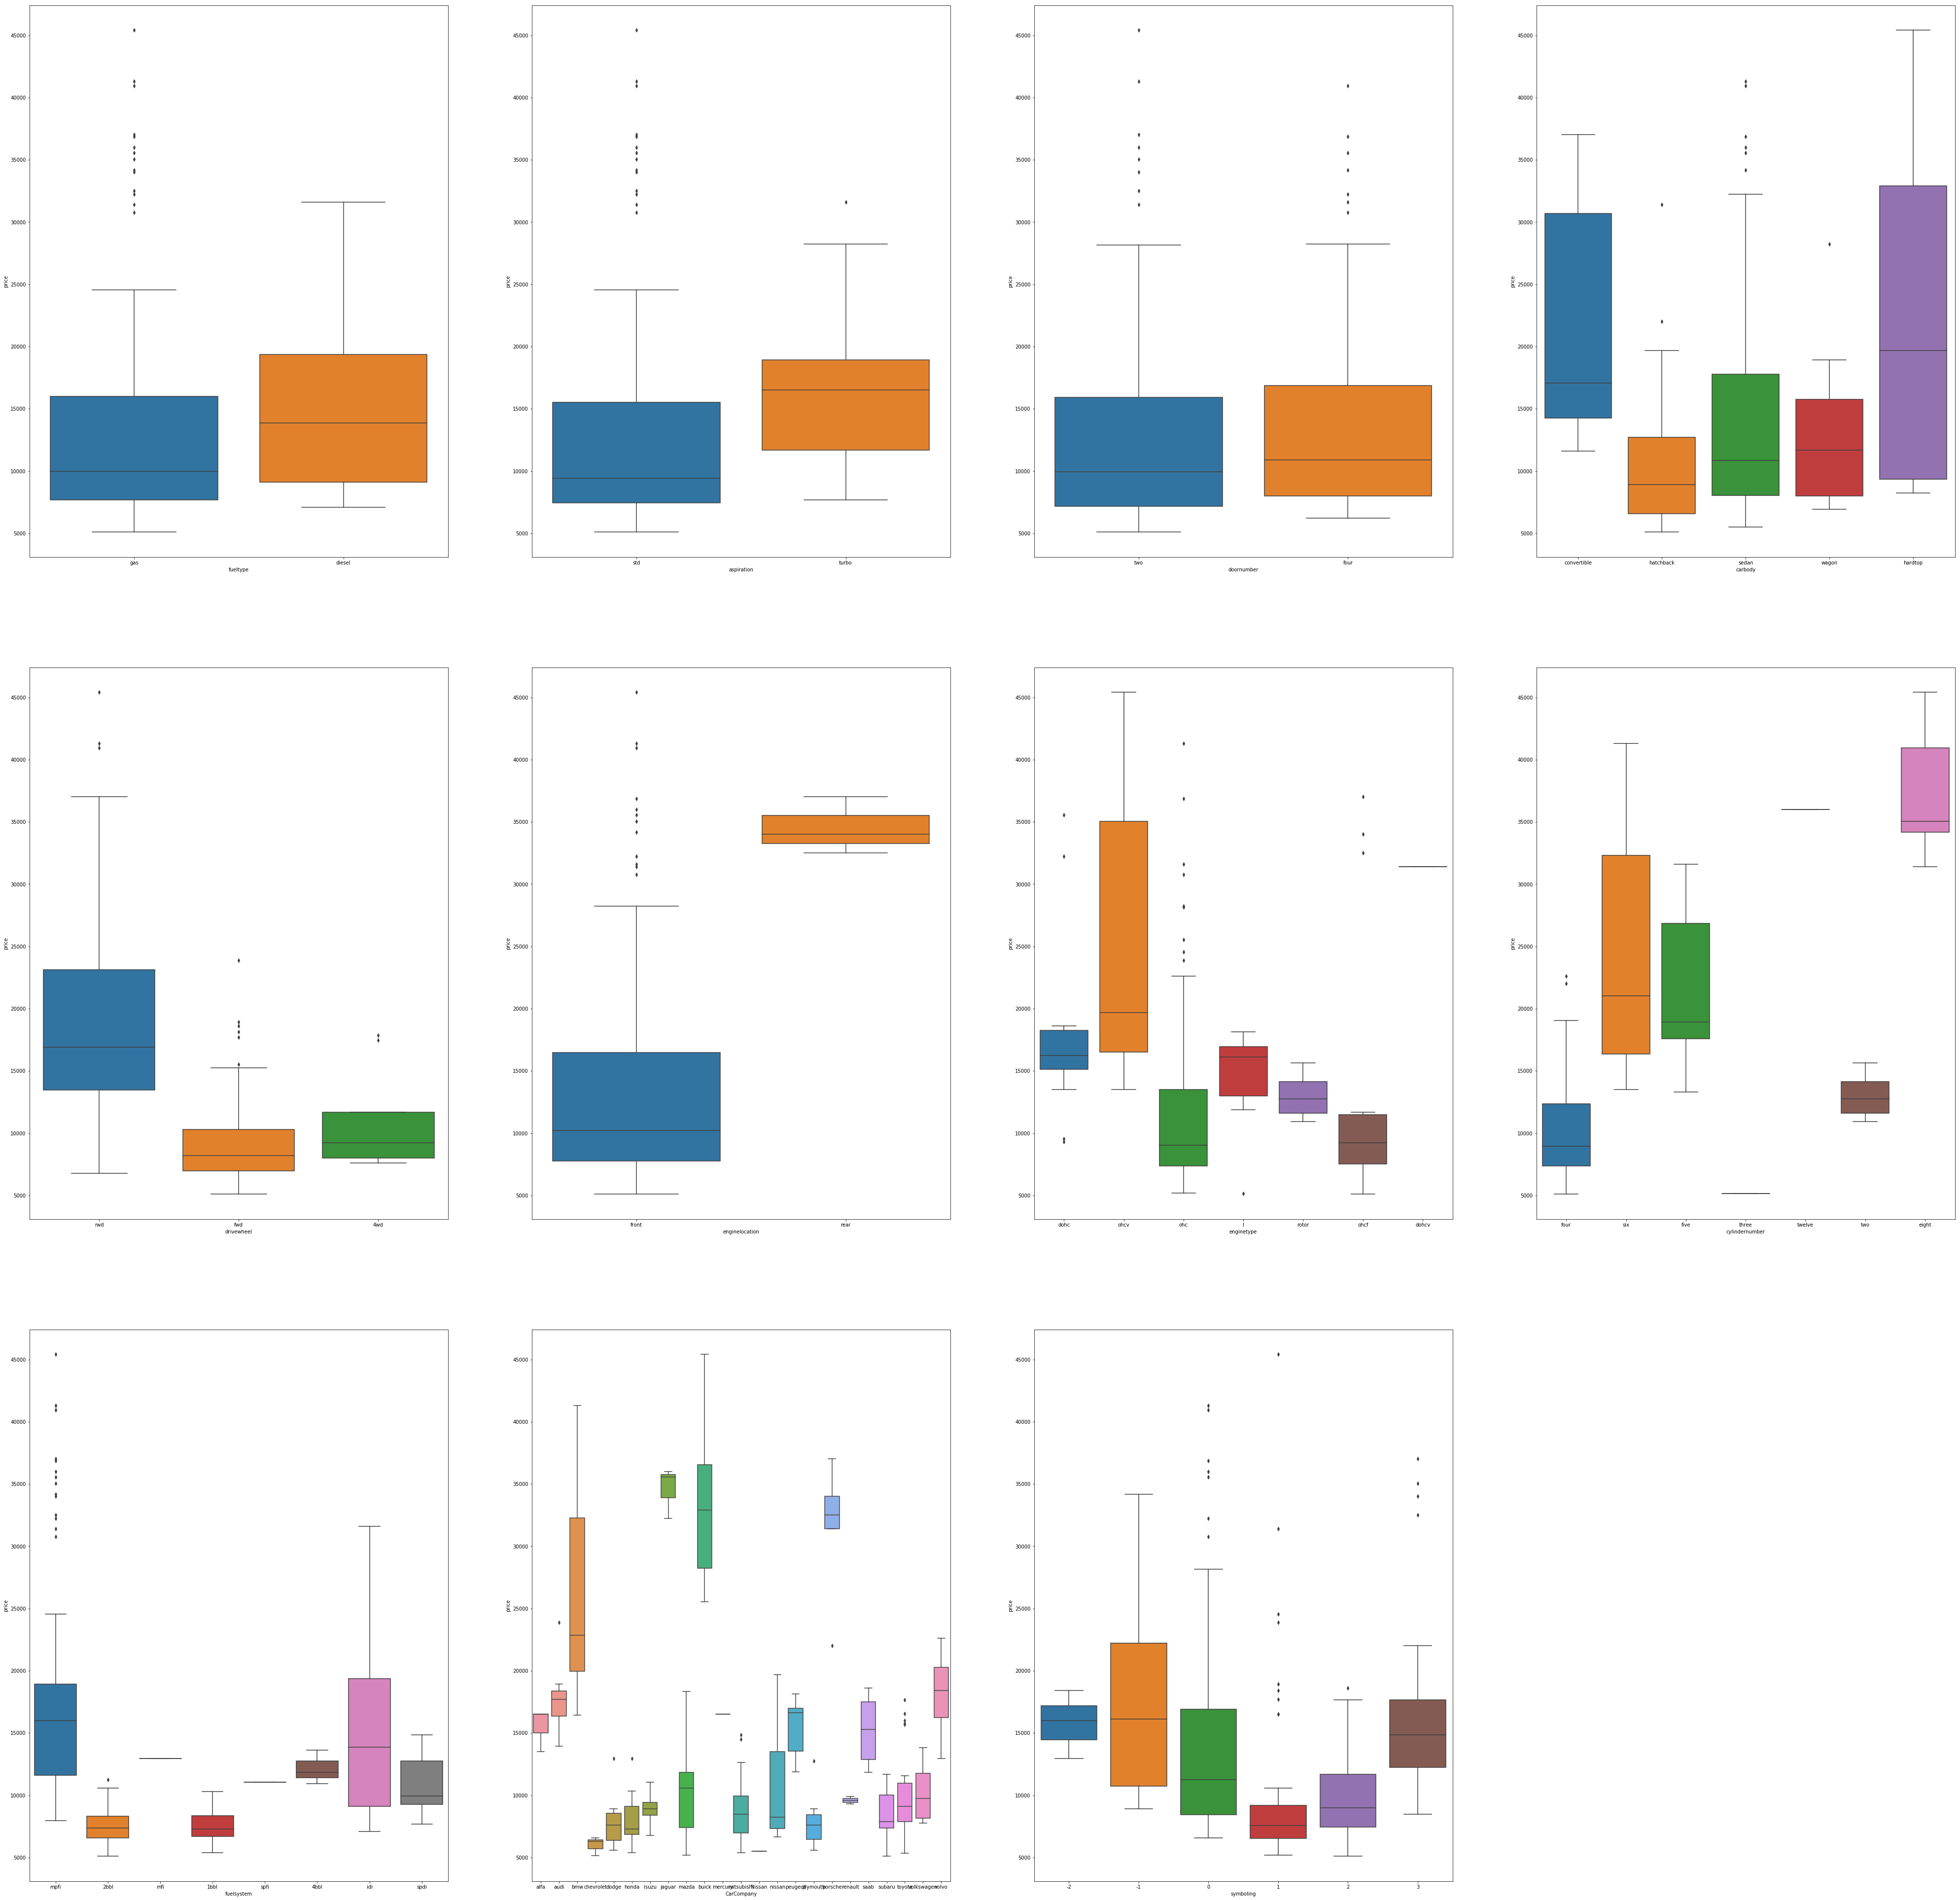

In [21]:
plt.figure(figsize=(70,70))
plt.subplot(3,4,1)
sns.boxplot(x='fueltype', y='price', data=carDetails)
plt.subplot(3,4,2)
sns.boxplot(x='aspiration', y='price', data=carDetails)
plt.subplot(3,4,3)
sns.boxplot(x='doornumber', y='price', data=carDetails)
plt.subplot(3,4,4)
sns.boxplot(x='carbody', y='price', data=carDetails)
plt.subplot(3,4,5)
sns.boxplot(x='drivewheel', y='price', data=carDetails)
plt.subplot(3,4,6)
sns.boxplot(x='enginelocation', y='price', data=carDetails)
plt.subplot(3,4,7)
sns.boxplot(x='enginetype', y='price', data=carDetails)
plt.subplot(3,4,8)
sns.boxplot(x='cylindernumber', y='price', data=carDetails)
plt.subplot(3,4,9)
sns.boxplot(x='fuelsystem', y='price', data=carDetails)
plt.subplot(3,4,10)
sns.boxplot(x='CarCompany', y='price', data=carDetails)
plt.subplot(3,4,11)
sns.boxplot(x='symboling', y='price', data=carDetails)

Step 5: Data Preparation

In [22]:
carDetails['fueltype'].unique() #can do 1,0 concept

array(['gas', 'diesel'], dtype=object)

In [23]:
carDetails['aspiration'].unique() #can do 1,0 concept

array(['std', 'turbo'], dtype=object)

In [24]:
carDetails['doornumber'].unique() #can do 1,0 concept

array(['two', 'four'], dtype=object)

In [25]:
carDetails['enginelocation'].unique()  #can do 1,0 concept

array(['front', 'rear'], dtype=object)

In [26]:
carDetails['carbody'].unique() #Can do Dummy variable concept

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [27]:
carDetails['drivewheel'].unique()  #Can do Dummy variable concept

array(['rwd', 'fwd', '4wd'], dtype=object)

In [28]:
carDetails['enginetype'].unique()#Can do Dummy variable concept

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [29]:
carDetails['cylindernumber'].unique()#Can do Dummy variable concept

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [30]:
carDetails['fuelsystem'].unique()#Can do Dummy variable concept

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [31]:
carDetails['CarCompany'].unique()#Can do Dummy variable concept

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [32]:
carDetails['symboling'].unique()#Can do Dummy variable concept

array([ 3,  1,  2,  0, -1, -2])

List of variables to can fit in binary (0,1) model

In [33]:
carDetails['fueltype'] = carDetails['fueltype'].map({'gas': 1, 'diesel': 0})
carDetails['aspiration'] = carDetails['aspiration'].map({'std': 1, 'turbo': 0})
carDetails['doornumber'] = carDetails['doornumber'].map({'two': 1, 'four': 0})
carDetails['enginelocation'] = carDetails['enginelocation'].map({'front': 1, 'rear': 0})

In [34]:
carDetails.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa
2,1,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa
3,2,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Dummy Variable creation 

In [35]:
carbody = pd.get_dummies(carDetails['carbody'],drop_first=True)
carDetails  = pd.concat([carDetails,carbody],axis=1)
carDetails = carDetails.drop('carbody',axis=1)
carDetails.head(10)

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,hardtop,hatchback,sedan,wagon
0,3,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.000,alfa,0,0,0,0
1,3,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.000,alfa,0,0,0,0
2,1,1,1,1,rwd,1,94.5,171.2,65.5,52.4,...,154,5000,19,26,16500.000,alfa,0,1,0,0
3,2,1,1,0,fwd,1,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.000,audi,0,0,1,0
4,2,1,1,0,4wd,1,99.4,176.6,66.4,54.3,...,115,5500,18,22,17450.000,audi,0,0,1,0
5,2,1,1,1,fwd,1,99.8,177.3,66.3,53.1,...,110,5500,19,25,15250.000,audi,0,0,1,0
6,1,1,1,0,fwd,1,105.8,192.7,71.4,55.7,...,110,5500,19,25,17710.000,audi,0,0,1,0
7,1,1,1,0,fwd,1,105.8,192.7,71.4,55.7,...,110,5500,19,25,18920.000,audi,0,0,0,1
8,1,1,0,0,fwd,1,105.8,192.7,71.4,55.9,...,140,5500,17,20,23875.000,audi,0,0,1,0
9,0,1,0,1,4wd,1,99.5,178.2,67.9,52.0,...,160,5500,16,22,17859.167,audi,0,1,0,0


In [36]:
drivewheel = pd.get_dummies(carDetails['drivewheel'],prefix = 'drivewheel', drop_first=True)
carDetails  = pd.concat([carDetails,drivewheel],axis=1)
carDetails = carDetails.drop('drivewheel',axis=1)
carDetails.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,citympg,highwaympg,price,CarCompany,hardtop,hatchback,sedan,wagon,drivewheel_fwd,drivewheel_rwd
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,21,27,13495.000,alfa,0,0,0,0,0,1
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,21,27,16500.000,alfa,0,0,0,0,0,1
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,19,26,16500.000,alfa,0,1,0,0,0,1
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,24,30,13950.000,audi,0,0,1,0,1,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,18,22,17450.000,audi,0,0,1,0,0,0
5,2,1,1,1,1,99.8,177.3,66.3,53.1,2507,...,19,25,15250.000,audi,0,0,1,0,1,0
6,1,1,1,0,1,105.8,192.7,71.4,55.7,2844,...,19,25,17710.000,audi,0,0,1,0,1,0
7,1,1,1,0,1,105.8,192.7,71.4,55.7,2954,...,19,25,18920.000,audi,0,0,0,1,1,0
8,1,1,0,0,1,105.8,192.7,71.4,55.9,3086,...,17,20,23875.000,audi,0,0,1,0,1,0
9,0,1,0,1,1,99.5,178.2,67.9,52.0,3053,...,16,22,17859.167,audi,0,1,0,0,0,0


In [37]:
enginetype = pd.get_dummies(carDetails['enginetype'],prefix = 'enginetype', drop_first=True)
carDetails  = pd.concat([carDetails,enginetype],axis=1)
carDetails = carDetails.drop('enginetype',axis=1)
carDetails.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,sedan,wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,1,0,1,0,0,0,1,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,1,0,0,0
5,2,1,1,1,1,99.8,177.3,66.3,53.1,2507,...,1,0,1,0,0,0,1,0,0,0
6,1,1,1,0,1,105.8,192.7,71.4,55.7,2844,...,1,0,1,0,0,0,1,0,0,0
7,1,1,1,0,1,105.8,192.7,71.4,55.7,2954,...,0,1,1,0,0,0,1,0,0,0
8,1,1,0,0,1,105.8,192.7,71.4,55.9,3086,...,1,0,1,0,0,0,1,0,0,0
9,0,1,0,1,1,99.5,178.2,67.9,52.0,3053,...,0,0,0,0,0,0,1,0,0,0


In [38]:
cylindernumber = pd.get_dummies(carDetails['cylindernumber'],prefix = 'cylindernumber' , drop_first=True)
carDetails  = pd.concat([carDetails,cylindernumber],axis=1)
carDetails = carDetails.drop('cylindernumber',axis=1)
carDetails.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,1,0,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,1,0,0,0,0,0
5,2,1,1,1,1,99.8,177.3,66.3,53.1,2507,...,1,0,0,0,1,0,0,0,0,0
6,1,1,1,0,1,105.8,192.7,71.4,55.7,2844,...,1,0,0,0,1,0,0,0,0,0
7,1,1,1,0,1,105.8,192.7,71.4,55.7,2954,...,1,0,0,0,1,0,0,0,0,0
8,1,1,0,0,1,105.8,192.7,71.4,55.9,3086,...,1,0,0,0,1,0,0,0,0,0
9,0,1,0,1,1,99.5,178.2,67.9,52.0,3053,...,1,0,0,0,1,0,0,0,0,0


In [39]:
fuelsystem = pd.get_dummies(carDetails['fuelsystem'],prefix ='fuelsystem', drop_first=True)
carDetails  = pd.concat([carDetails,fuelsystem],axis=1)
carDetails = carDetails.drop('fuelsystem',axis=1)
carDetails.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0
5,2,1,1,1,1,99.8,177.3,66.3,53.1,2507,...,0,0,0,0,0,0,0,1,0,0
6,1,1,1,0,1,105.8,192.7,71.4,55.7,2844,...,0,0,0,0,0,0,0,1,0,0
7,1,1,1,0,1,105.8,192.7,71.4,55.7,2954,...,0,0,0,0,0,0,0,1,0,0
8,1,1,0,0,1,105.8,192.7,71.4,55.9,3086,...,0,0,0,0,0,0,0,1,0,0
9,0,1,0,1,1,99.5,178.2,67.9,52.0,3053,...,0,0,0,0,0,0,0,1,0,0


In [40]:
CarCompany = pd.get_dummies(carDetails['CarCompany'],drop_first=True)
carDetails  = pd.concat([carDetails,CarCompany],axis=1)
carDetails = carDetails.drop('CarCompany',axis=1)
carDetails.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0
5,2,1,1,1,1,99.8,177.3,66.3,53.1,2507,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,1,105.8,192.7,71.4,55.7,2844,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,1,105.8,192.7,71.4,55.7,2954,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,1,105.8,192.7,71.4,55.9,3086,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,1,1,99.5,178.2,67.9,52.0,3053,...,0,0,0,0,0,0,0,0,0,0


In [41]:
symboling = pd.get_dummies(carDetails['symboling'], prefix ='symboling', drop_first=True)
carDetails  = pd.concat([carDetails,symboling],axis=1)
carDetails = carDetails.drop('symboling',axis=1)
carDetails.head(10)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,saab,subaru,toyota,volkswagen,volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,1,0
5,1,1,1,1,99.8,177.3,66.3,53.1,2507,136,...,0,0,0,0,0,0,0,0,1,0
6,1,1,0,1,105.8,192.7,71.4,55.7,2844,136,...,0,0,0,0,0,0,0,1,0,0
7,1,1,0,1,105.8,192.7,71.4,55.7,2954,136,...,0,0,0,0,0,0,0,1,0,0
8,1,0,0,1,105.8,192.7,71.4,55.9,3086,131,...,0,0,0,0,0,0,0,1,0,0
9,1,0,1,1,99.5,178.2,67.9,52.0,3053,131,...,0,0,0,0,0,0,1,0,0,0


Step 6: Splitting the Data into Training and Testing Sets ..

In [42]:
np.random.seed(0)

In [43]:
car_train, car_test = train_test_split(carDetails, train_size =0.7 ,random_state= 100)
print(car_train.shape)
print(car_test.shape)

(143, 70)
(62, 70)


/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
car_train.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'alfa', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'vol

In [45]:
car_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,saab,subaru,toyota,volkswagen,volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.440559,0.993007,98.523077,173.416783,65.839860,53.551748,2539.510490,124.958042,...,0.020979,0.076923,0.139860,0.048951,0.041958,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.288490,0.387050,0.498199,0.083624,5.961835,12.598122,2.214203,2.433766,544.650539,40.974034,...,0.143818,0.267406,0.348061,0.216524,0.201198,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,97.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,110.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,141.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,115.600000,202.600000,72.300000,59.100000,4066.000000,326.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
car_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,saab,subaru,toyota,volkswagen,volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.435484,0.967742,99.295161,175.508065,66.064516,54.124194,2592.596774,131.403226,...,0.048387,0.016129,0.193548,0.080645,0.080645,0.145161,0.274194,0.177419,0.241935,0.145161
std,0.319058,0.385142,0.499868,0.178127,6.172983,11.681726,1.985282,2.438670,462.719100,43.147273,...,0.216335,0.127000,0.398304,0.274512,0.274512,0.355139,0.449749,0.385142,0.431751,0.355139
min,0.000000,0.000000,0.000000,0.000000,86.600000,144.600000,62.500000,49.400000,1819.000000,79.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,95.700000,169.350000,64.600000,52.150000,2275.000000,108.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,97.850000,174.800000,65.600000,54.450000,2535.000000,121.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,103.150000,185.375000,66.500000,55.700000,2944.250000,144.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,120.900000,208.100000,72.000000,59.800000,3900.000000,308.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Rescaling the Features

In [47]:
scaler = MinMaxScaler()
num_vars = ['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
            'stroke','compressionratio','horsepower','peakrpm','citympg', 'highwaympg']

In [48]:
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])
car_train[num_vars]

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,0.068818,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.150000,0.083333,0.551020,0.500000,0.567568
125,0.466890,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.156250,0.395833,0.551020,0.166667,0.270270
166,0.122110,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.150000,0.266667,1.000000,0.361111,0.324324
1,0.314446,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.125000,0.262500,0.346939,0.222222,0.270270
199,0.382131,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.031250,0.475000,0.387755,0.111111,0.135135
190,0.134321,0.272414,0.400000,0.308333,0.318584,0.284329,0.181132,0.404762,0.611111,0.093750,0.175000,0.551020,0.305556,0.324324
96,0.065779,0.272414,0.393496,0.291667,0.592920,0.187355,0.135849,0.373016,0.555556,0.150000,0.087500,0.428571,0.500000,0.540541
177,0.169351,0.544828,0.560976,0.516667,0.539823,0.376261,0.230189,0.500000,0.681818,0.106250,0.183333,0.020408,0.388889,0.405405
181,0.293726,0.617241,0.759350,0.516667,0.557522,0.645074,0.377358,0.468254,0.585859,0.137500,0.450000,0.428571,0.166667,0.189189
97,0.079592,0.272414,0.473171,0.291667,0.504425,0.212956,0.135849,0.373016,0.555556,0.150000,0.087500,0.428571,0.500000,0.540541


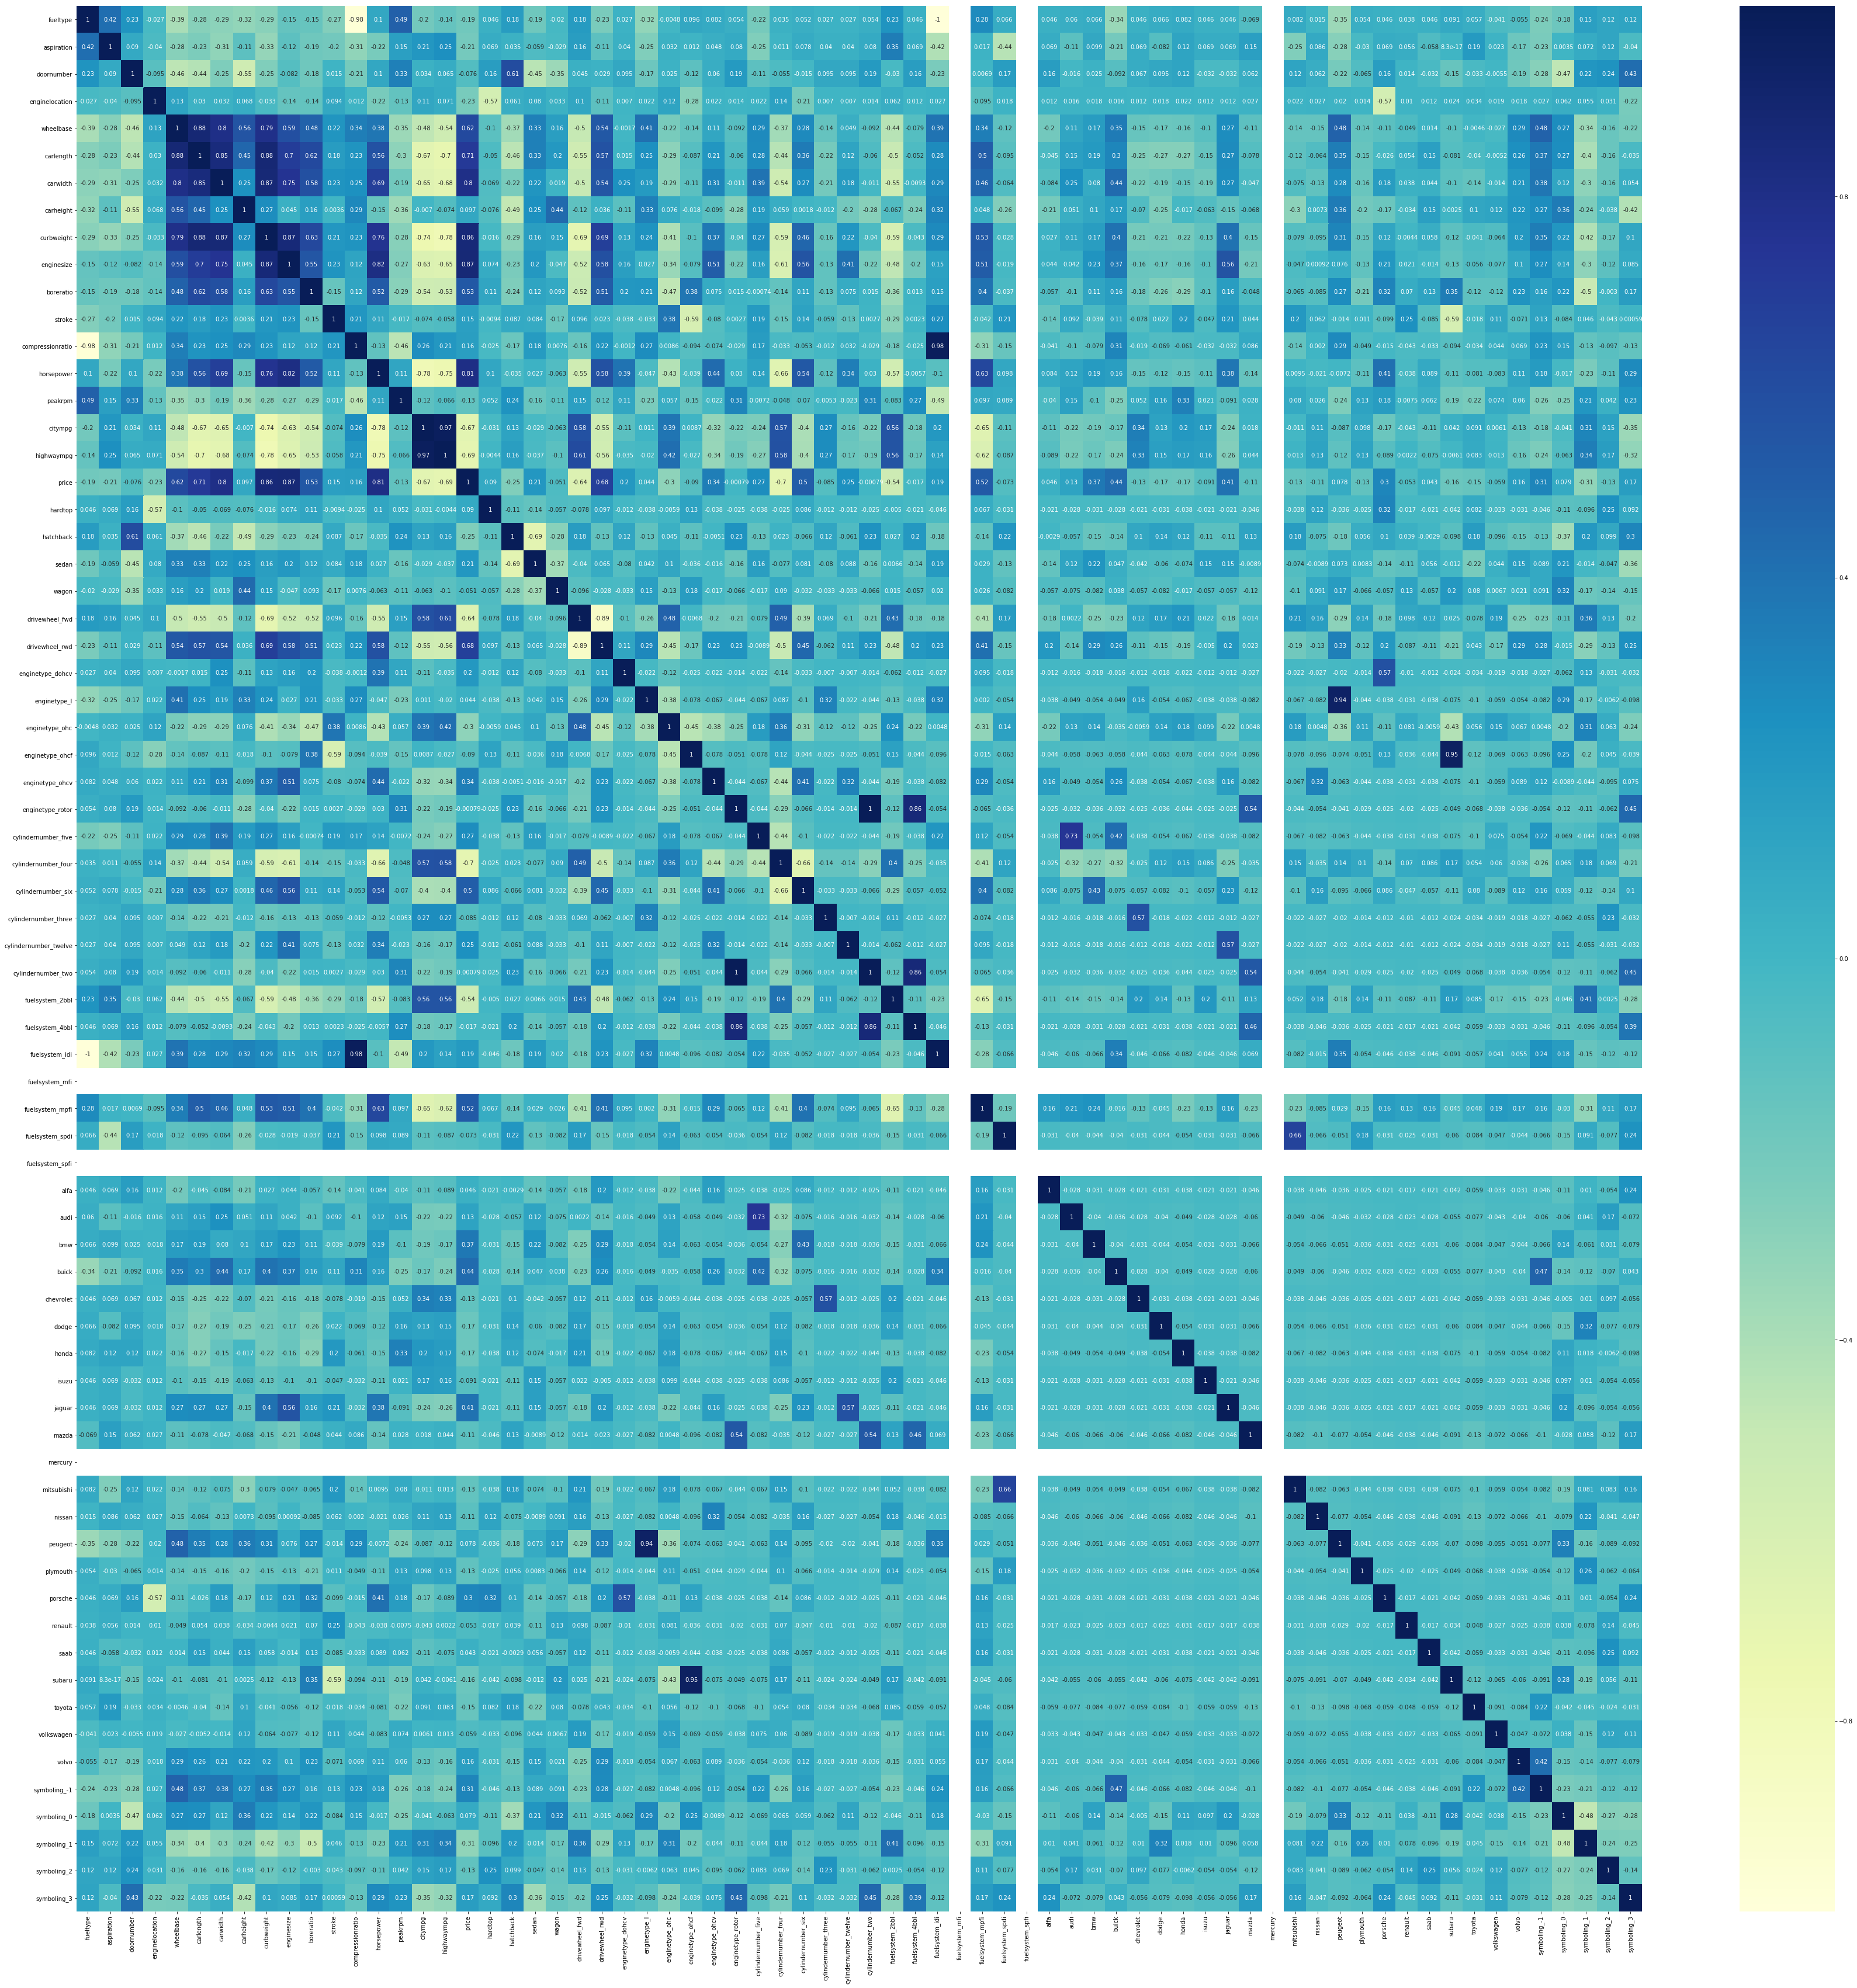

In [49]:
plt.figure(figsize=(60,60))
sns.heatmap(car_train.corr(),annot=True,cmap= 'YlGnBu')

Dividing into X and Y sets for the model building

In [50]:
y_train = car_train.pop('price')
y_train

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
190    0.134321
96     0.065779
177    0.169351
181    0.293726
97     0.079592
120    0.030693
117    0.360030
57     0.235572
44     0.104940
153    0.049728
85     0.051689
127    0.798685
151    0.033704
204    0.483659
10     0.312512
20     0.040252
170    0.167997
82     0.207503
12     0.437937
16     1.000000
178    0.316048
90     0.054728
89     0.010526
45     0.104940
161    0.089510
         ...   
129    0.726096
159    0.073763
132    0.185982
108    0.223278
155    0.101113
130    0.115396
86     0.084841
93     0.061635
137    0.373014
144    0.113683
58     0.290825
60     0.093295
107    0.187364
143    0.133768
203    0.479377
34     0.055557
14     0.537254
66     0.365389
53     0.043567
98     0.086499
180    0.292068
94     0.060254
138    0.000000
176    0.159682
79     0.071028
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143

In [51]:
x_train = car_train
x_train

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,saab,subaru,toyota,volkswagen,volvo,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
122,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,0,0,0,0,0,1,0,0
125,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,0,0,0,0,0,0,1
166,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,1,0,0,0,0,1,0,0
1,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,0,0,0,0,1
199,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,1,1,0,0,0,0
190,1,1,1,1,0.272414,0.400000,0.308333,0.318584,0.284329,0.181132,...,0,0,0,1,0,0,0,0,0,1
96,1,1,0,1,0.272414,0.393496,0.291667,0.592920,0.187355,0.135849,...,0,0,0,0,0,0,0,1,0,0
177,1,1,0,1,0.544828,0.560976,0.516667,0.539823,0.376261,0.230189,...,0,0,1,0,0,1,0,0,0,0
181,1,1,0,1,0.617241,0.759350,0.516667,0.557522,0.645074,0.377358,...,0,0,1,0,0,1,0,0,0,0
97,1,1,0,1,0.272414,0.473171,0.291667,0.504425,0.212956,0.135849,...,0,0,0,0,0,0,0,1,0,0


Step 7: Building a linear model

In [52]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe= RFE(lm,20)
rfe= rfe.fit(x_train,y_train)

In [53]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 15),
 ('aspiration', False, 4),
 ('doornumber', False, 39),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 16),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 25),
 ('highwaympg', False, 17),
 ('hardtop', False, 21),
 ('hatchback', False, 20),
 ('sedan', False, 22),
 ('wagon', False, 23),
 ('drivewheel_fwd', False, 44),
 ('drivewheel_rwd', False, 31),
 ('enginetype_dohcv', False, 2),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 41),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 32),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 19),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_t

In [54]:
col_included = x_train.columns[rfe.support_]
col_included

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'bmw', 'peugeot',
       'porsche', 'saab', 'subaru', 'volvo'],
      dtype='object')

In [55]:
col_excluded = x_train.columns[~rfe.support_]
col_excluded

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'alfa', 'audi', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'plymouth', 'renault', 'toyota', 'volkswagen', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3'],
      dtype='object')

In [56]:
x_train_rfe= x_train[col_included]

In [57]:
x_train_sm= sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        21:26:47   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0930      0.046     -2.006      0.047      -0.185      -0.001
enginelocation           -0.2087      0.039     -5.310      0.000      -0.287      -0.131
carwidth                  0.2790      0.062      4.514      0.000       0.157       0.401
curbweight                0.3011      0.075      4.040      0.000       0.154       0.449
enginesize                1.5805      0.176      9.003      0.000       1.233       1.928
boreratio                -0.4868      0.068     -7.149      0.000      -0.622      -0.352
stroke                   -0.2484      0.047     -5.269      0.000      -0.342      -0.155
enginetype_l              0.1491      0.026      5.753      0.000       0.098       0.200
enginetype_ohcf           0.0864      0.035      2.453      0.016       0.017       0.156
enginetype_rotor          0.3014      0.036      8.293      0.000       0.229       0.373
cylindernumber_five       0.2198      0.035      6.280      0.000       0.151       0.289
cylindernumber_four       0.2756      0.040      6.838      0.000       0.196       0.355
cylindernumber_three      0.3478      0.050      6.926      0.000       0.248       0.447
cylindernumber_twelve    -0.5489      0.097     -5.673      0.000      -0.740      -0.357
cylindernumber_two        0.3014      0.036      8.293      0.000       0.229       0.373
bmw                       0.3087      0.027     11.488      0.000       0.256       0.362
peugeot                  -0.1987      0.032     -6.217      0.000      -0.262      -0.135
porsche                   0.2533      0.049      5.173      0.000       0.156       0.350
saab                      0.1009      0.036      2.833      0.005       0.030       0.171
subaru                   -0.0294      0.046     -0.635      0.526      -0.121       0.062
volvo                     0.1111      0.030      3.741      0.000       0.052       0.170
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.867
Skew:                           0.797   Prob(JB):                     1.48e-11
Kurtosis:                       5.414   Cond. No.                     6.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range (x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
11,cylindernumber_three,inf
15,peugeot,inf
13,cylindernumber_two,inf
6,enginetype_l,inf
8,enginetype_rotor,inf
0,enginelocation,79.10
3,enginesize,37.13
18,subaru,32.00
7,enginetype_ohcf,25.13
10,cylindernumber_four,15.81


Dropping one field 'subaru'  as P -value is 0.526

In [59]:
x_train_rfe_1 = x_train_rfe.drop(['subaru'],axis=1)

In [60]:
x_train_sm= sm.add_constant(x_train_rfe_1)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        21:26:47   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0637      0.091     -0.703      0.483      -0.243       0.116
enginelocation           -0.2381      0.081     -2.957      0.004      -0.397      -0.079
carwidth                  0.2790      0.062      4.514      0.000       0.157       0.401
curbweight                0.3011      0.075      4.040      0.000       0.154       0.449
enginesize                1.5805      0.176      9.003      0.000       1.233       1.928
boreratio                -0.4868      0.068     -7.149      0.000      -0.622      -0.352
stroke                   -0.2484      0.047     -5.269      0.000      -0.342      -0.155
enginetype_l              0.1491      0.026      5.753      0.000       0.098       0.200
enginetype_ohcf           0.0570      0.031      1.868      0.064      -0.003       0.117
enginetype_rotor          0.3014      0.036      8.293      0.000       0.229       0.373
cylindernumber_five       0.2198      0.035      6.280      0.000       0.151       0.289
cylindernumber_four       0.2756      0.040      6.838      0.000       0.196       0.355
cylindernumber_three      0.3478      0.050      6.926      0.000       0.248       0.447
cylindernumber_twelve    -0.5489      0.097     -5.673      0.000      -0.740      -0.357
cylindernumber_two        0.3014      0.036      8.293      0.000       0.229       0.373
bmw                       0.3087      0.027     11.488      0.000       0.256       0.362
peugeot                  -0.1987      0.032     -6.217      0.000      -0.262      -0.135
porsche                   0.2533      0.049      5.173      0.000       0.156       0.350
saab                      0.1009      0.036      2.833      0.005       0.030       0.171
volvo                     0.1111      0.030      3.741      0.000       0.052       0.170
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.867
Skew:                           0.797   Prob(JB):                     1.48e-11
Kurtosis:                       5.414   Cond. No.                     6.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_1.values,i) for i in range (x_train_rfe_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
13,cylindernumber_two,inf
6,enginetype_l,inf
15,peugeot,inf
8,enginetype_rotor,inf
11,cylindernumber_three,inf
3,enginesize,98.50
0,enginelocation,62.51
2,curbweight,59.33
4,boreratio,52.55
10,cylindernumber_four,48.15


Dropping second field 'enginetype_rotor' as VIF is infinity

In [62]:
x_train_rfe_2 = x_train_rfe_1.drop(['enginetype_rotor'],axis=1)

In [63]:
x_train_sm= sm.add_constant(x_train_rfe_2)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        21:26:47   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0637      0.091     -0.703      0.483      -0.243       0.116
enginelocation           -0.2381      0.081     -2.957      0.004      -0.397      -0.079
carwidth                  0.2790      0.062      4.514      0.000       0.157       0.401
curbweight                0.3011      0.075      4.040      0.000       0.154       0.449
enginesize                1.5805      0.176      9.003      0.000       1.233       1.928
boreratio                -0.4868      0.068     -7.149      0.000      -0.622      -0.352
stroke                   -0.2484      0.047     -5.269      0.000      -0.342      -0.155
enginetype_l              0.1491      0.026      5.753      0.000       0.098       0.200
enginetype_ohcf           0.0570      0.031      1.868      0.064      -0.003       0.117
cylindernumber_five       0.2198      0.035      6.280      0.000       0.151       0.289
cylindernumber_four       0.2756      0.040      6.838      0.000       0.196       0.355
cylindernumber_three      0.3478      0.050      6.926      0.000       0.248       0.447
cylindernumber_twelve    -0.5489      0.097     -5.673      0.000      -0.740      -0.357
cylindernumber_two        0.6028      0.073      8.293      0.000       0.459       0.747
bmw                       0.3087      0.027     11.488      0.000       0.256       0.362
peugeot                  -0.1987      0.032     -6.217      0.000      -0.262      -0.135
porsche                   0.2533      0.049      5.173      0.000       0.156       0.350
saab                      0.1009      0.036      2.833      0.005       0.030       0.171
volvo                     0.1111      0.030      3.741      0.000       0.052       0.170
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.867
Skew:                           0.797   Prob(JB):                     1.48e-11
Kurtosis:                       5.414   Cond. No.                     3.82e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.5e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_2.values,i) for i in range (x_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
10,cylindernumber_three,inf
14,peugeot,inf
6,enginetype_l,inf
3,enginesize,98.50
0,enginelocation,62.51
2,curbweight,59.33
4,boreratio,52.55
9,cylindernumber_four,48.15
1,carwidth,44.81
5,stroke,34.47


Dropping third field 'enginetype_l' as VIF is infinity

In [65]:
x_train_rfe_3 = x_train_rfe_2.drop(['enginetype_l'],axis=1)

In [66]:
x_train_sm= sm.add_constant(x_train_rfe_3)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.19e-71
Time:                        21:26:48   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0637      0.091     -0.703      0.483      -0.243       0.116
enginelocation           -0.2381      0.081     -2.957      0.004      -0.397      -0.079
carwidth                  0.2790      0.062      4.514      0.000       0.157       0.401
curbweight                0.3011      0.075      4.040      0.000       0.154       0.449
enginesize                1.5805      0.176      9.003      0.000       1.233       1.928
boreratio                -0.4868      0.068     -7.149      0.000      -0.622      -0.352
stroke                   -0.2484      0.047     -5.269      0.000      -0.342      -0.155
enginetype_ohcf           0.0570      0.031      1.868      0.064      -0.003       0.117
cylindernumber_five       0.2198      0.035      6.280      0.000       0.151       0.289
cylindernumber_four       0.2756      0.040      6.838      0.000       0.196       0.355
cylindernumber_three      0.4969      0.073      6.784      0.000       0.352       0.642
cylindernumber_twelve    -0.5489      0.097     -5.673      0.000      -0.740      -0.357
cylindernumber_two        0.6028      0.073      8.293      0.000       0.459       0.747
bmw                       0.3087      0.027     11.488      0.000       0.256       0.362
peugeot                  -0.0497      0.029     -1.689      0.094      -0.108       0.009
porsche                   0.2533      0.049      5.173      0.000       0.156       0.350
saab                      0.1009      0.036      2.833      0.005       0.030       0.171
volvo                     0.1111      0.030      3.741      0.000       0.052       0.170
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.867
Skew:                           0.797   Prob(JB):                     1.48e-11
Kurtosis:                       5.414   Cond. No.                         97.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_3.values,i) for i in range (x_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
3,enginesize,98.50
0,enginelocation,62.51
2,curbweight,59.33
4,boreratio,52.55
8,cylindernumber_four,48.15
1,carwidth,44.81
5,stroke,34.47
11,cylindernumber_two,5.67
7,cylindernumber_five,3.20
10,cylindernumber_twelve,3.00


Dropping fourth field 'peugeot' as p-value is 0.094

In [68]:
x_train_rfe_4 = x_train_rfe_3.drop(['peugeot'],axis=1)

In [69]:
x_train_sm= sm.add_constant(x_train_rfe_4)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     136.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.11e-71
Time:                        21:26:48   Log-Likelihood:                 224.93
No. Observations:                 143   AIC:                            -415.9
Df Residuals:                     126   BIC:                            -365.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1048      0.088     -1.193      0.235      -0.279       0.069
enginelocation           -0.1898      0.076     -2.503      0.014      -0.340      -0.040
carwidth                  0.2495      0.060      4.178      0.000       0.131       0.368
curbweight                0.2453      0.067      3.644      0.000       0.112       0.379
enginesize                1.7001      0.162     10.507      0.000       1.380       2.020
boreratio                -0.5167      0.066     -7.801      0.000      -0.648      -0.386
stroke                   -0.2396      0.047     -5.077      0.000      -0.333      -0.146
enginetype_ohcf           0.0757      0.029      2.643      0.009       0.019       0.132
cylindernumber_five       0.2384      0.033      7.122      0.000       0.172       0.305
cylindernumber_four       0.2792      0.041      6.886      0.000       0.199       0.359
cylindernumber_three      0.4915      0.074      6.668      0.000       0.346       0.637
cylindernumber_twelve    -0.5792      0.096     -6.048      0.000      -0.769      -0.390
cylindernumber_two        0.6344      0.071      8.968      0.000       0.494       0.774
bmw                       0.3134      0.027     11.638      0.000       0.260       0.367
porsche                   0.2767      0.047      5.849      0.000       0.183       0.370
saab                      0.1222      0.034      3.644      0.000       0.056       0.189
volvo                     0.1338      0.027      5.018      0.000       0.081       0.187
==============================================================================
Omnibus:                       24.507   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.616
Skew:                           0.781   Prob(JB):                     1.24e-10
Kurtosis:                       5.284   Cond. No.                         90.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_4.values,i) for i in range (x_train_rfe_4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
3,enginesize,88.13
0,enginelocation,58.01
4,boreratio,51.29
8,cylindernumber_four,47.82
2,curbweight,47.30
1,carwidth,42.43
5,stroke,34.27
11,cylindernumber_two,5.54
7,cylindernumber_five,3.04
10,cylindernumber_twelve,2.97


Dropping fifth field 'enginelocation' as VIF is 58.01

In [71]:
x_train_rfe_5 = x_train_rfe_4.drop(['enginelocation'],axis=1)

In [72]:
x_train_sm= sm.add_constant(x_train_rfe_5)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     139.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.67e-71
Time:                        21:26:48   Log-Likelihood:                 221.46
No. Observations:                 143   AIC:                            -410.9
Df Residuals:                     127   BIC:                            -363.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3011      0.040     -7.451      0.000      -0.381      -0.221
carwidth                  0.2042      0.058      3.516      0.001       0.089       0.319
curbweight                0.2631      0.068      3.851      0.000       0.128       0.398
enginesize                1.7848      0.161     11.053      0.000       1.465       2.104
boreratio                -0.5562      0.066     -8.474      0.000      -0.686      -0.426
stroke                   -0.2324      0.048     -4.834      0.000      -0.328      -0.137
enginetype_ohcf           0.1022      0.027      3.760      0.000       0.048       0.156
cylindernumber_five       0.2536      0.034      7.548      0.000       0.187       0.320
cylindernumber_four       0.2932      0.041      7.156      0.000       0.212       0.374
cylindernumber_three      0.5022      0.075      6.687      0.000       0.354       0.651
cylindernumber_twelve    -0.6106      0.097     -6.302      0.000      -0.802      -0.419
cylindernumber_two        0.6678      0.071      9.418      0.000       0.527       0.808
bmw                       0.3171      0.027     11.555      0.000       0.263       0.371
porsche                   0.3493      0.038      9.160      0.000       0.274       0.425
saab                      0.1340      0.034      3.953      0.000       0.067       0.201
volvo                     0.1477      0.027      5.547      0.000       0.095       0.200
==============================================================================
Omnibus:                       21.845   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.656
Skew:                           0.766   Prob(JB):                     2.98e-08
Kurtosis:                       4.862   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_5.values,i) for i in range (x_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
2,enginesize,73.10
1,curbweight,47.22
3,boreratio,43.66
0,carwidth,38.65
4,stroke,34.03
7,cylindernumber_four,25.03
10,cylindernumber_two,3.89
9,cylindernumber_twelve,2.76
6,cylindernumber_five,2.63
5,enginetype_ohcf,2.21


Dropping sixth field 'stroke' as VIF is 34.03

In [74]:
x_train_rfe_6 = x_train_rfe_5.drop(['stroke'],axis=1)

In [75]:
x_train_sm= sm.add_constant(x_train_rfe_6)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     125.7
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.36e-67
Time:                        21:26:48   Log-Likelihood:                 209.38
No. Observations:                 143   AIC:                            -388.8
Df Residuals:                     128   BIC:                            -344.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3254      0.043     -7.487      0.000      -0.411      -0.239
carwidth                  0.1868      0.063      2.972      0.004       0.062       0.311
curbweight                0.3225      0.073      4.427      0.000       0.178       0.467
enginesize                1.3601      0.147      9.262      0.000       1.070       1.651
boreratio                -0.4475      0.067     -6.695      0.000      -0.580      -0.315
enginetype_ohcf           0.1439      0.028      5.151      0.000       0.089       0.199
cylindernumber_five       0.1913      0.034      5.689      0.000       0.125       0.258
cylindernumber_four       0.2052      0.040      5.158      0.000       0.126       0.284
cylindernumber_three      0.4080      0.079      5.190      0.000       0.252       0.564
cylindernumber_twelve    -0.3444      0.086     -3.986      0.000      -0.515      -0.173
cylindernumber_two        0.5160      0.069      7.489      0.000       0.380       0.652
bmw                       0.3217      0.030     10.825      0.000       0.263       0.381
porsche                   0.3591      0.041      8.702      0.000       0.277       0.441
saab                      0.1448      0.037      3.948      0.000       0.072       0.217
volvo                     0.1500      0.029      5.200      0.000       0.093       0.207
==============================================================================
Omnibus:                       16.675   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.800
Skew:                           0.708   Prob(JB):                     3.04e-05
Kurtosis:                       4.218   Cond. No.                         58.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_6.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_6.values,i) for i in range (x_train_rfe_6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
1,curbweight,45.69
0,carwidth,38.35
2,enginesize,34.20
3,boreratio,33.51
6,cylindernumber_four,7.40
4,enginetype_ohcf,2.01
9,cylindernumber_two,2.01
5,cylindernumber_five,1.96
8,cylindernumber_twelve,1.56
11,porsche,1.40


Dropping seventh field 'carwidth' as VIF is 38.35

In [77]:
x_train_rfe_7 = x_train_rfe_6.drop(['carwidth'],axis=1)

In [78]:
x_train_sm= sm.add_constant(x_train_rfe_7)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.20e-67
Time:                        21:26:48   Log-Likelihood:                 204.61
No. Observations:                 143   AIC:                            -381.2
Df Residuals:                     129   BIC:                            -339.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3004      0.044     -6.840      0.000      -0.387      -0.213
curbweight                0.4263      0.066      6.473      0.000       0.296       0.557
enginesize                1.3863      0.151      9.183      0.000       1.088       1.685
boreratio                -0.4289      0.069     -6.258      0.000      -0.565      -0.293
enginetype_ohcf           0.1351      0.029      4.720      0.000       0.078       0.192
cylindernumber_five       0.2210      0.033      6.682      0.000       0.156       0.286
cylindernumber_four       0.2075      0.041      5.064      0.000       0.126       0.289
cylindernumber_three      0.3796      0.080      4.723      0.000       0.221       0.539
cylindernumber_twelve    -0.3471      0.089     -3.900      0.000      -0.523      -0.171
cylindernumber_two        0.5271      0.071      7.439      0.000       0.387       0.667
bmw                       0.3141      0.030     10.299      0.000       0.254       0.374
porsche                   0.3753      0.042      8.908      0.000       0.292       0.459
saab                      0.1444      0.038      3.824      0.000       0.070       0.219
volvo                     0.1595      0.030      5.402      0.000       0.101       0.218
==============================================================================
Omnibus:                        9.330   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.228
Skew:                           0.476   Prob(JB):                      0.00601
Kurtosis:                       3.900   Cond. No.                         56.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_7.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_7.values,i) for i in range (x_train_rfe_7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,curbweight,34.91
2,boreratio,33.48
1,enginesize,31.18
5,cylindernumber_four,5.46
3,enginetype_ohcf,2.01
8,cylindernumber_two,1.77
7,cylindernumber_twelve,1.53
4,cylindernumber_five,1.45
10,porsche,1.36
12,volvo,1.30


Dropping eighth field 'curbweight' as VIF is 34.91

In [80]:
x_train_rfe_8 = x_train_rfe_7.drop(['curbweight'],axis=1)

In [81]:
x_train_sm= sm.add_constant(x_train_rfe_8)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     102.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           5.23e-60
Time:                        21:26:48   Log-Likelihood:                 184.49
No. Observations:                 143   AIC:                            -343.0
Df Residuals:                     130   BIC:                            -304.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2744      0.050     -5.472      0.000      -0.374      -0.175
enginesize                1.7917      0.158     11.375      0.000       1.480       2.103
boreratio                -0.2927      0.075     -3.914      0.000      -0.441      -0.145
enginetype_ohcf           0.0940      0.032      2.937      0.004       0.031       0.157
cylindernumber_five       0.2589      0.037      6.934      0.000       0.185       0.333
cylindernumber_four       0.1871      0.047      3.995      0.000       0.094       0.280
cylindernumber_three      0.3287      0.092      3.585      0.000       0.147       0.510
cylindernumber_twelve    -0.4644      0.100     -4.648      0.000      -0.662      -0.267
cylindernumber_two        0.5659      0.081      6.991      0.000       0.406       0.726
bmw                       0.2873      0.035      8.293      0.000       0.219       0.356
porsche                   0.2992      0.046      6.449      0.000       0.207       0.391
saab                      0.1634      0.043      3.785      0.000       0.078       0.249
volvo                     0.1779      0.034      5.279      0.000       0.111       0.245
==============================================================================
Omnibus:                        6.752   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.715
Skew:                           0.403   Prob(JB):                       0.0348
Kurtosis:                       3.691   Cond. No.                         52.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_8.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_8.values,i) for i in range (x_train_rfe_8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
1,boreratio,30.11
0,enginesize,14.20
4,cylindernumber_four,5.45
2,enginetype_ohcf,1.93
7,cylindernumber_two,1.63
6,cylindernumber_twelve,1.39
3,cylindernumber_five,1.30
11,volvo,1.28
9,porsche,1.26
8,bmw,1.24


Dropping nineth field 'boreratio' as VIF is 30.11

In [83]:
x_train_rfe_9 = x_train_rfe_8.drop(['boreratio'],axis=1)

In [84]:
x_train_sm= sm.add_constant(x_train_rfe_9)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     99.05
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.71e-58
Time:                        21:26:48   Log-Likelihood:                 176.53
No. Observations:                 143   AIC:                            -329.1
Df Residuals:                     131   BIC:                            -293.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1554      0.042     -3.700      0.000      -0.238      -0.072
enginesize                1.2496      0.079     15.825      0.000       1.093       1.406
enginetype_ohcf           0.0016      0.023      0.068      0.946      -0.043       0.047
cylindernumber_five       0.1775      0.033      5.435      0.000       0.113       0.242
cylindernumber_four       0.0424      0.030      1.401      0.164      -0.017       0.102
cylindernumber_three      0.1563      0.085      1.845      0.067      -0.011       0.324
cylindernumber_twelve    -0.2411      0.086     -2.791      0.006      -0.412      -0.070
cylindernumber_two        0.3194      0.054      5.963      0.000       0.213       0.425
bmw                       0.2370      0.034      6.995      0.000       0.170       0.304
porsche                   0.2309      0.045      5.100      0.000       0.141       0.320
saab                      0.1121      0.043      2.587      0.011       0.026       0.198
volvo                     0.1158      0.031      3.698      0.000       0.054       0.178
==============================================================================
Omnibus:                        4.283   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.224
Skew:                           0.247   Prob(JB):                        0.121
Kurtosis:                       3.682   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_9.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_9.values,i) for i in range (x_train_rfe_9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,enginesize,2.64
3,cylindernumber_four,1.84
2,cylindernumber_five,1.23
5,cylindernumber_twelve,1.23
7,bmw,1.20
1,enginetype_ohcf,1.14
8,porsche,1.14
10,volvo,1.09
9,saab,1.04
4,cylindernumber_three,1.00


Dropping tenth field 'enginetype_ohcf' as P-value is 0.946

In [86]:
x_train_rfe_10 = x_train_rfe_9.drop(['enginetype_ohcf'],axis=1)

In [87]:
x_train_sm= sm.add_constant(x_train_rfe_10)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           6.24e-59
Time:                        21:26:48   Log-Likelihood:                 176.53
No. Observations:                 143   AIC:                            -331.1
Df Residuals:                     132   BIC:                            -298.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1552      0.042     -3.718      0.000      -0.238      -0.073
enginesize                1.2493      0.079     15.901      0.000       1.094       1.405
cylindernumber_five       0.1774      0.032      5.458      0.000       0.113       0.242
cylindernumber_four       0.0424      0.030      1.407      0.162      -0.017       0.102
cylindernumber_three      0.1561      0.084      1.851      0.066      -0.011       0.323
cylindernumber_twelve    -0.2410      0.086     -2.801      0.006      -0.411      -0.071
cylindernumber_two        0.3193      0.053      5.990      0.000       0.214       0.425
bmw                       0.2369      0.034      7.024      0.000       0.170       0.304
porsche                   0.2313      0.045      5.182      0.000       0.143       0.320
saab                      0.1119      0.043      2.597      0.010       0.027       0.197
volvo                     0.1157      0.031      3.715      0.000       0.054       0.177
==============================================================================
Omnibus:                        4.281   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.225
Skew:                           0.246   Prob(JB):                        0.121
Kurtosis:                       3.683   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_10.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_10.values,i) for i in range (x_train_rfe_10.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,enginesize,2.64
2,cylindernumber_four,1.74
1,cylindernumber_five,1.23
4,cylindernumber_twelve,1.22
6,bmw,1.20
7,porsche,1.11
9,volvo,1.08
8,saab,1.03
3,cylindernumber_three,1.00
5,cylindernumber_two,1.00


Dropping 11th field 'cylindernumber_four' as P-value is 0.162

In [89]:
x_train_rfe_11 = x_train_rfe_10.drop(['cylindernumber_four'],axis=1)

In [90]:
x_train_sm= sm.add_constant(x_train_rfe_11)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     120.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.46e-59
Time:                        21:26:48   Log-Likelihood:                 175.46
No. Observations:                 143   AIC:                            -330.9
Df Residuals:                     133   BIC:                            -301.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0994      0.013     -7.617      0.000      -0.125      -0.074
enginesize                1.1646      0.051     22.981      0.000       1.064       1.265
cylindernumber_five       0.1502      0.026      5.726      0.000       0.098       0.202
cylindernumber_three      0.1003      0.075      1.342      0.182      -0.047       0.248
cylindernumber_twelve    -0.2121      0.084     -2.529      0.013      -0.378      -0.046
cylindernumber_two        0.2671      0.038      6.945      0.000       0.191       0.343
bmw                       0.2229      0.032      6.891      0.000       0.159       0.287
porsche                   0.2285      0.045      5.106      0.000       0.140       0.317
saab                      0.1177      0.043      2.734      0.007       0.033       0.203
volvo                     0.1151      0.031      3.682      0.000       0.053       0.177
==============================================================================
Omnibus:                        5.157   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.571
Skew:                           0.259   Prob(JB):                       0.0617
Kurtosis:                       3.816   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_11.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_11.values,i) for i in range (x_train_rfe_11.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,enginesize,1.61
1,cylindernumber_five,1.14
3,cylindernumber_twelve,1.14
5,bmw,1.14
6,porsche,1.09
8,volvo,1.08
7,saab,1.02
2,cylindernumber_three,1.00
4,cylindernumber_two,1.00


Dropping 12th field 'cylindernumber_three' as P-value is 0.182

In [92]:
x_train_rfe_12 = x_train_rfe_11.drop(['cylindernumber_three'],axis=1)

In [93]:
x_train_sm= sm.add_constant(x_train_rfe_12)
lr = sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     135.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.96e-60
Time:                        21:26:48   Log-Likelihood:                 174.50
No. Observations:                 143   AIC:                            -331.0
Df Residuals:                     134   BIC:                            -304.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0963      0.013     -7.475      0.000      -0.122      -0.071
enginesize                1.1546      0.050     22.966      0.000       1.055       1.254
cylindernumber_five       0.1505      0.026      5.722      0.000       0.098       0.203
cylindernumber_twelve    -0.2051      0.084     -2.443      0.016      -0.371      -0.039
cylindernumber_two        0.2645      0.039      6.866      0.000       0.188       0.341
bmw                       0.2240      0.032      6.905      0.000       0.160       0.288
porsche                   0.2301      0.045      5.127      0.000       0.141       0.319
saab                      0.1169      0.043      2.708      0.008       0.032       0.202
volvo                     0.1152      0.031      3.675      0.000       0.053       0.177
==============================================================================
Omnibus:                        5.109   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.272
Skew:                           0.281   Prob(JB):                       0.0717
Kurtosis:                       3.755   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif = pd.DataFrame()
vif['Features']=x_train_rfe_12.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe_12.values,i) for i in range (x_train_rfe_12.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,enginesize,1.61
1,cylindernumber_five,1.14
2,cylindernumber_twelve,1.14
4,bmw,1.14
5,porsche,1.09
7,volvo,1.08
6,saab,1.02
3,cylindernumber_two,1.00


Step 8: Residual Analysis of the train data

In [95]:
y_train_pred  = lr_model.predict(x_train_sm)
y_train_pred

122    0.064903
125    0.525917
166    0.064903
1      0.204329
199    0.319525
190    0.112831
96     0.060546
177    0.169473
181    0.339398
97     0.060546
120    0.030047
117    0.221757
57     0.207413
44     0.030047
153    0.038761
85     0.169473
127    0.713270
151    0.038761
204    0.367453
10     0.332456
20     0.030047
170    0.274042
82     0.317613
12     0.576451
16     0.772519
178    0.382968
90     0.086688
89     0.060546
45     0.030047
161    0.064903
         ...   
129    0.752484
159    0.117188
132    0.282031
108    0.300184
155    0.038761
130    0.213043
86     0.169473
93     0.060546
137    0.282031
144    0.108474
58     0.250983
60     0.169473
107    0.160758
143    0.108474
203    0.384881
34     0.038761
14     0.576451
66     0.221757
53     0.034404
98     0.060546
180    0.382968
94     0.060546
138    0.060546
176    0.169473
79     0.064903
87     0.117188
103    0.426539
67     0.585774
24     0.030047
8      0.359206
Length: 143, dtype: floa

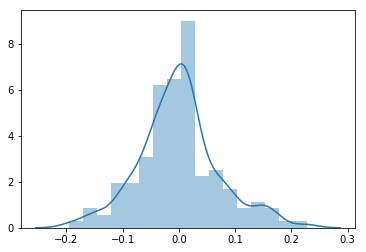

In [96]:
res= y_train - y_train_pred
sns.distplot(res)

Step 9: Making Predictions Using the Final Model

In [97]:
num_vars = ['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
            'stroke','compressionratio','horsepower','peakrpm','citympg', 'highwaympg']

car_test[num_vars]

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
160,7738.0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47
186,8495.0,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34
59,8845.0,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32
165,9298.0,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29
140,7603.0,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31
64,11245.0,98.8,177.8,66.5,55.5,2425,122,3.39,3.39,8.6,84,4800,26,32
198,18420.0,104.3,188.8,67.2,56.2,3045,130,3.62,3.15,7.5,162,5100,17,22
75,16503.0,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000,19,24
172,17669.0,98.4,176.2,65.6,53.0,2975,146,3.62,3.50,9.3,116,4800,24,30
104,17199.0,91.3,170.7,67.9,49.7,3071,181,3.43,3.27,9.0,160,5200,19,25


In [98]:
car_test[num_vars] = scaler.transform(car_test[num_vars])

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [99]:
y_test = car_test.pop('price')
x_test = car_test

In [100]:
x_test_new = x_test[x_train_rfe_12.columns]

In [101]:
x_test_sm = sm.add_constant(x_test_new)

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [102]:
x_test_sm = sm.add_constant(x_test_new)

In [103]:
y_test_pred = lr_model.predict(x_test_sm)

In [104]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.884691740370322

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %f" % mean_squared_error(y_test, y_test_pred))

Mean squared error: 0.006163


Step 10: Model Evaluation

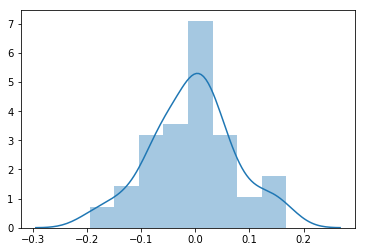

In [106]:
res_test = y_test - y_test_pred
sns.distplot(res_test)

Text(0, 0.5, 'y_pred')

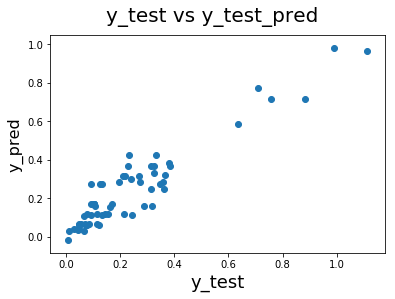

In [107]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

Conclusion :

The R square and Adjusted R square value in CarModelWithOutliers is almost same which is 89.0% and 88.4% respectively which indicates that none of the parameters in CarModelWithOutliers model are reduntant.

And also from Error Terms scatter plot we can see that the error (y_test-y-pred) is unequally distributed, and does not follow any pattern, as there is no curve, and shows no relation which indicates that it is just the white noise.

The RSME value is 0.006147

As we can see that the model seems to be stable, The variables that can affect price are:

1) enginesize
2) cylindernumber_five
3) cylindernumber_twelve
4) bmw
5) porsche
6) volvo	
7) saab	
8) cylindernumber_two